In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import scipy

In [2]:
dc_re = pd.read_csv('/Users/justinsmith/Documents/GitHub/DC_Properties.csv')

/Users/justinsmith/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
dc_re.dropna(subset=['PRICE'], inplace=True)

In [4]:
dc_re = dc_re.drop(columns=['STATE', 'CITY'])

In [5]:
dc_re_resid = dc_re[dc_re['SOURCE'] == 'Residential']
dc_re_condo = dc_re[dc_re['SOURCE'] != 'Residential']

In [6]:
dc_re_resid['diff_yr'] = abs(dc_re_resid['EYB']- dc_re_resid['YR_RMDL'])
dc_re_condo['diff_yr'] = abs(dc_re_condo['EYB']- dc_re_condo['YR_RMDL'])
dc_re_resid = dc_re_resid.drop(index=56600)

/Users/justinsmith/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/justinsmith/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


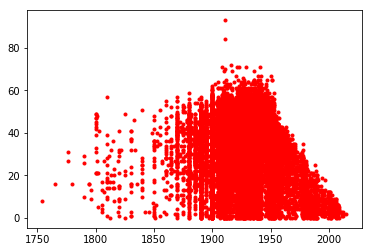

In [10]:
plt.plot(dc_re_resid['AYB'], dc_re_resid['diff_yr'], 'r.')

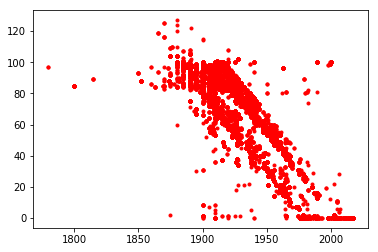

In [11]:
plt.plot(dc_re_condo['AYB'], dc_re_condo['diff_yr'], 'r.')

In [13]:
# Filling NA in year columns

dc_re_resid['AYB'] = dc_re_resid['AYB'].fillna(0)
dc_re_resid['YR_RMDL'] = dc_re_resid['YR_RMDL'].fillna(0)
dc_re_resid['EYB'] = dc_re_resid['EYB'].fillna(0)

In [14]:
# Cleaning actual year built, year remodel, and effective year built. 

for i in range(len(dc_re_resid)):
    if dc_re_resid.iloc[i,8] == 0:
        dc_re_resid.iloc[i,8] = dc_re_resid.iloc[i,10]

for i in range(len(dc_re_resid)):
    if dc_re_resid.iloc[i,9]  == 0:
        dc_re_resid.iloc[i,9] = dc_re_resid.iloc[i,10]\
        
for i in range(len(dc_re_resid)):
    if dc_re_resid.iloc[i,8] > dc_re_resid.iloc[i,10]:
        dc_re_resid.iloc[i,10] = dc_re_resid.iloc[i,8]
        
for i in range(len(dc_re_resid)):
    if dc_re_resid.iloc[i,10] > dc_re_resid.iloc[i,9]:
        dc_re_resid.iloc[i,9] = dc_re_resid.iloc[i,10]

In [47]:
dc_re_resid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57864 entries, 0 to 106695
Data columns (total 36 columns):
Unnamed: 0         57864 non-null int64
BATHRM             57864 non-null int64
HF_BATHRM          57864 non-null int64
HEAT               57864 non-null object
AC                 57864 non-null object
NUM_UNITS          57864 non-null float64
ROOMS              57864 non-null int64
BEDRM              57864 non-null int64
AYB                57864 non-null float64
YR_RMDL            57864 non-null float64
EYB                57864 non-null float64
STORIES            57864 non-null float64
SALEDATE           57864 non-null datetime64[ns]
PRICE              57864 non-null float64
QUALIFIED          57864 non-null object
SALE_NUM           57864 non-null int64
GBA                57864 non-null float64
BLDG_NUM           57864 non-null int64
STYLE              57864 non-null object
STRUCT             57864 non-null object
GRADE              57864 non-null object
CNDTN              57

In [27]:
# DEALING WITH NULLS AND COLUMNS

dc_re_resid.dropna(axis=1, how='all', inplace=True)
dc_re_resid.drop(columns=['FULLADDRESS', 'CENSUS_BLOCK', 'diff_yr', 'NATIONALGRID',
                          'ASSESSMENT_SUBNBHD','X','Y','GIS_LAST_MOD_DTTM','SOURCE', 
                          'QUADRANT'], inplace=True)
dc_re_resid.dropna(inplace=True)

In [31]:
# Cleaning data types

dc_re_resid['SALEDATE']  = pd.to_datetime(dc_re_resid['SALEDATE']).dt.date
dc_re_resid['SALEDATE']= pd.to_datetime(dc_re_resid['SALEDATE'])

dc_re_resid['WARD'] = dc_re_resid['WARD'].str.extract('(\d+)', expand=False)
dc_re_resid['WARD'] = dc_re_resid['WARD'].astype('int')

In [39]:
dc_re_resid['SQUARE'].replace(to_replace='PAR ', value= 9999, inplace=True)

In [43]:
dc_re_resid['SQUARE'] = dc_re_resid['SQUARE'].astype('int')

In [46]:
dc_re_resid['USECODE'] = dc_re_resid['USECODE'].astype('int')

In [49]:
dc_re_resid['BLDG_NUM'].unique()

array([1, 2])

In [50]:
dc_re_resid_dummies = pd.get_dummies(dc_re_resid)

In [51]:
dc_re_resid_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57864 entries, 0 to 106695
Columns: 197 entries, Unnamed: 0 to ASSESSMENT_NBHD_Woodridge
dtypes: datetime64[ns](1), float64(12), int64(12), uint8(172)
memory usage: 21.0 MB


In [54]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

In [63]:
target_res = dc_re_resid['PRICE']
X_res = dc_re_resid_dummies.drop(columns='PRICE')
pca = PCA(n_components=10)

In [64]:
pca.fit(X_res)

TypeError: float() argument must be a string or a number, not 'Timestamp'

TypeError: findall() missing 1 required positional argument: 'string'